# 概念

## 正式性定义

梯度下降法（gradient descent），又名最速下降法（steepest descent）是求解无约束最优化问题最常用的方法，它是一种迭代方法，每一步主要的操作是求解目标函数的梯度向量，将当前位置的负梯度方向作为搜索方向（因为在该方向上目标函数下降最快，这也是最速下降法名称的由来）。

梯度下降法特点：越接近目标值，步长越小，下降速度越慢。

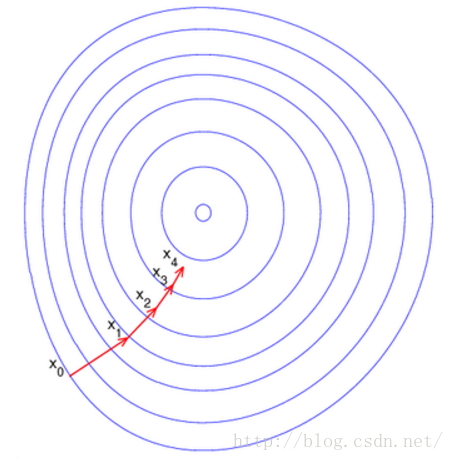

这里每一个圈代表一个函数梯度，最中心表示函数极值点，每次迭代根据当前位置求得的梯度（用于确定搜索方向以及与步长共同决定前进速度）和步长找到一个新的位置，这样不断迭代最终到达目标函数局部最优点（如果目标函数是凸函数，则到达全局最优点）。

## 形象性定义

所谓的梯度下降:
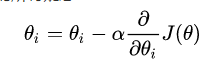

说明:上面的公式就是一个位置更新公式,说白了，就是你每走一步，就记录下你现在的位置，也就是等号左边的θi,那么走一步走多远呐？答案应该是α，那你要朝哪个方向走呢？答案是J(θ)关于θi的偏导数

既有前进的方向，又有前进的距离，很容易联想到学过的向量。这些向量首尾相连，这个轨迹就是这个方程的曲线图。画在图上大概是这个样子：

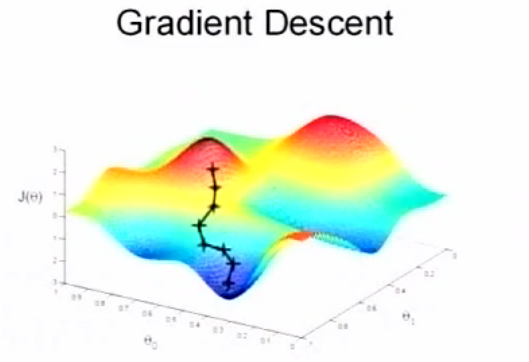

# 公式推导

## 一般推导

一个通俗化的式子(风险函数 损失函数):


**释义:**
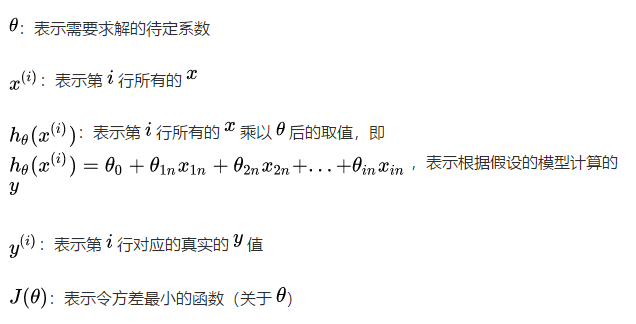

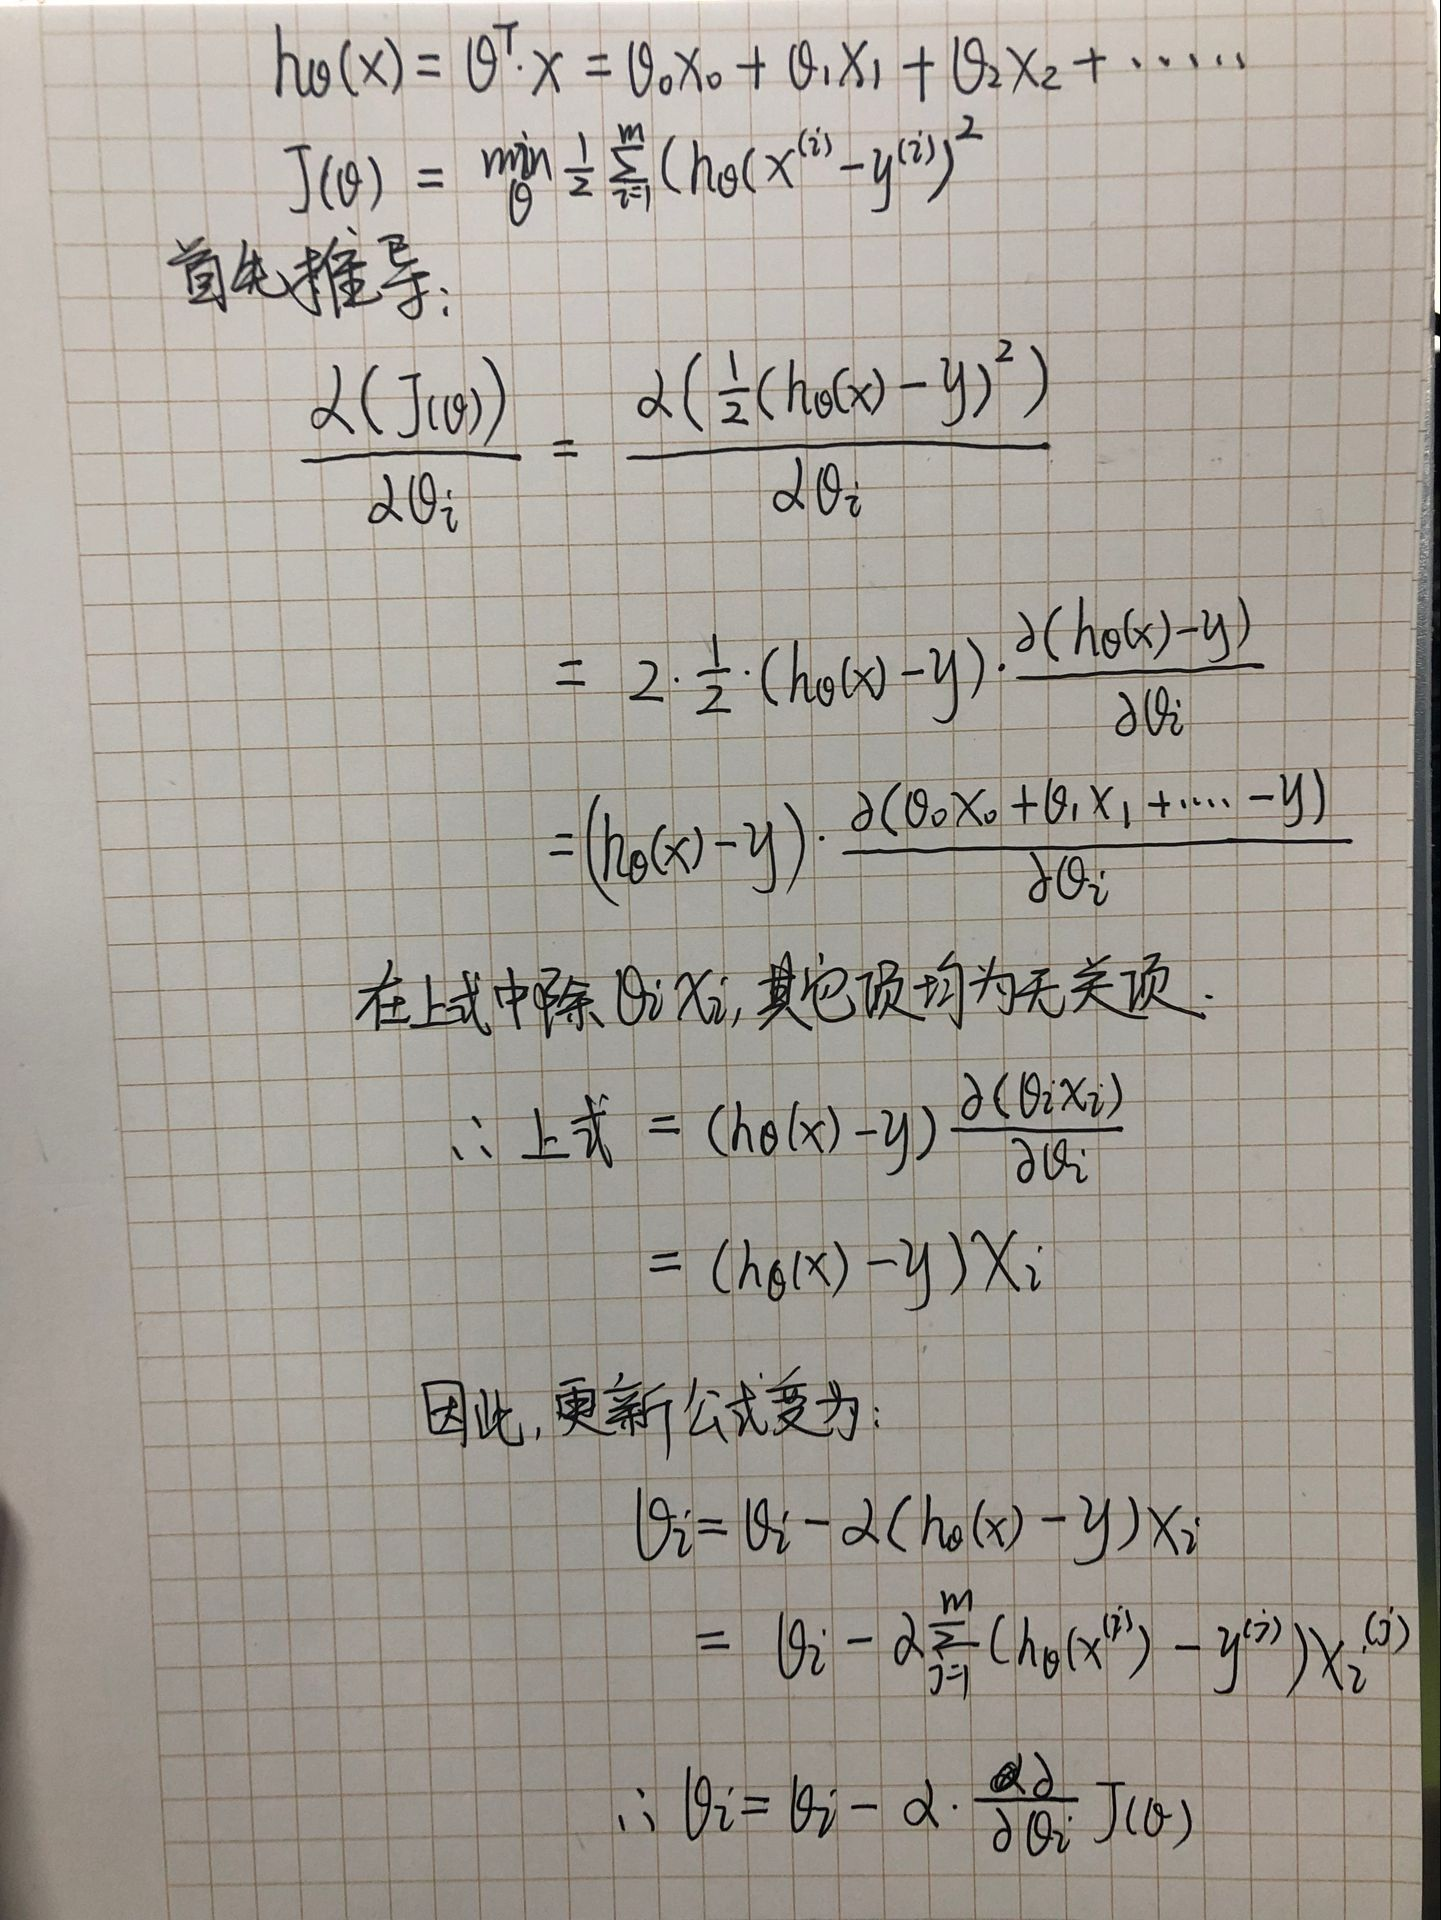

## 矩阵求解法(不常用)

推导公式用到的:
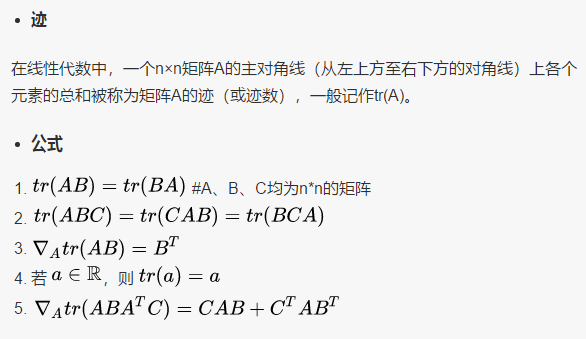

推导:
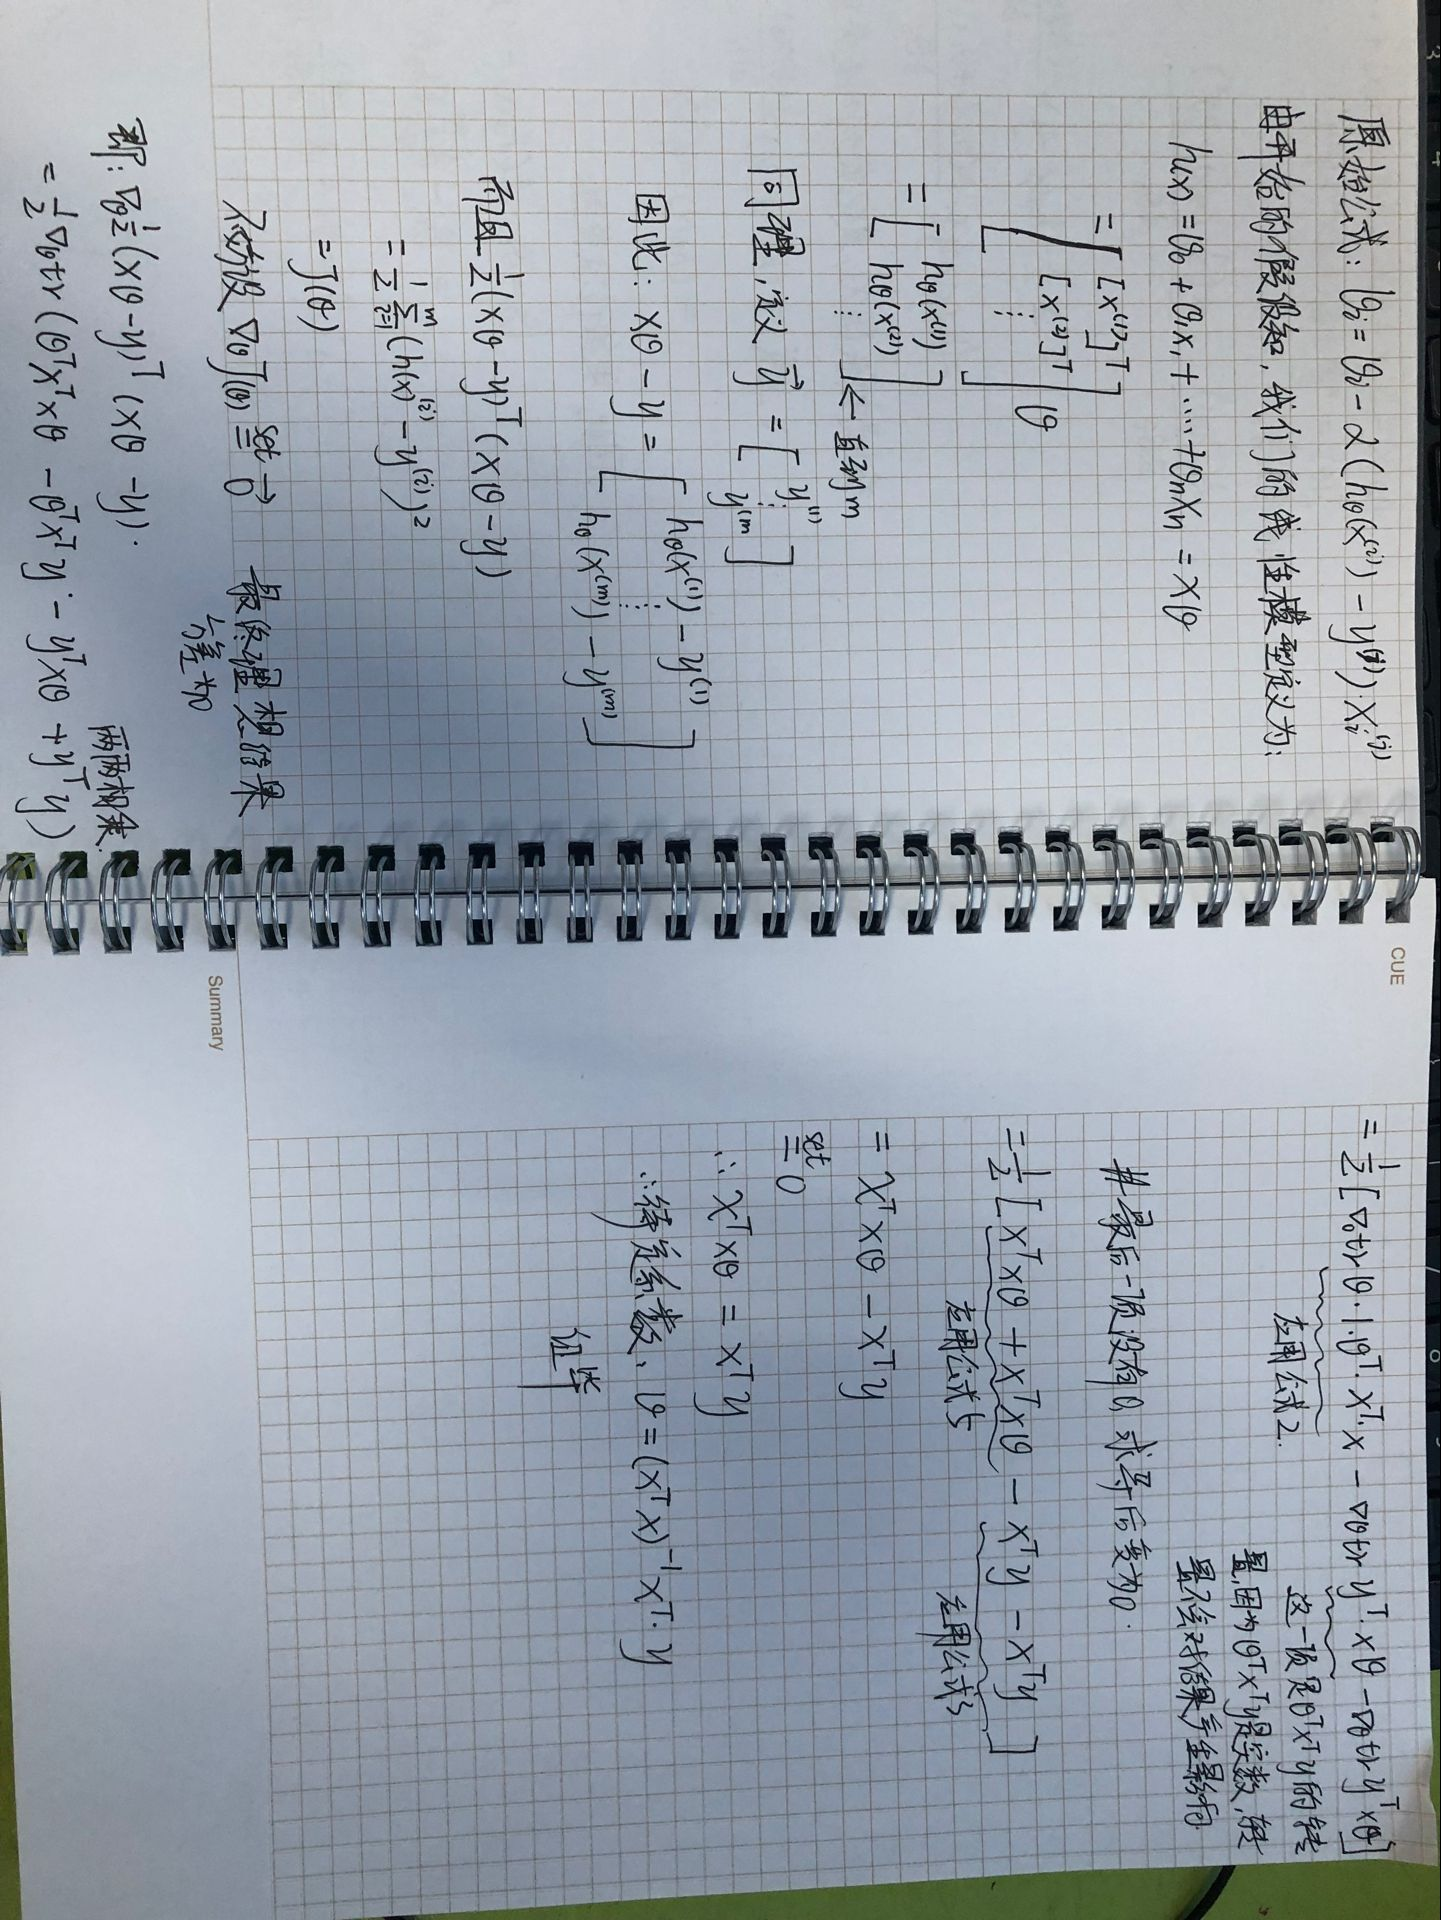

# 梯度下降算法优化总结

[梯度下降优化算法总结](https://blog.csdn.net/shuzfan/article/details/75675568)

## 梯度下降算法变种

### 批量梯度下降(BGD)

当"公式推导"过程中的样本的数量不为1时,即:
    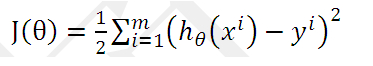

通过批量梯度下降(BGD)可以得到:
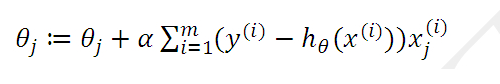

从上面公式可以注意到，它得到的是一个全局最优解，但是每迭代一步，都要用到训练集所有的数据

**优点：**

  （1）一次迭代是对所有样本进行计算，此时利用矩阵进行操作，实现了并行。
  
  （2）由全数据集确定的方向能够更好地代表样本总体，从而更准确地朝向极值所在的方向。当目标函数为凸函数时，BGD一定能够得到全局最优。
  
**缺点：**

  （1）当样本数目 m 很大时，每迭代一步都需要对所有样本计算，训练过程会很慢。

### 随机梯度下降(SGD)

当样本集数据量m很大时，批量梯度下降算法每迭代一次的复杂度为O(mn),复杂度很高。因此，为了减少复杂度，当m很大时，我们更多时候使用随机梯度下降算法(stochastic gradient descent)。

伪代码解释:
    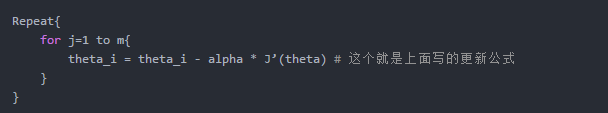
    这里随机选择的数据是m行

即每读取一条样本，就迭代对ΘT进行更新，然后判断其是否收敛，若没收敛，则继续读取样本进行处理，如果所有样本都读取完毕了，则循环重新从头开始读取样本进行处理。

这样迭代一次的算法复杂度为O(n)。对于大数据集，很有可能只需读取一小部分数据，函数J(Θ)就收敛了。比如样本集数据量为100万，有可能读取几千条或几万条时，函数就达到了收敛值。所以当数据量很大时，更倾向于选择随机梯度下降算法。

但是，相较于批量梯度下降算法而言，随机梯度下降算法使得J(Θ)趋近于最小值的速度更快，但是有可能造成永远不可能收敛于最小值，有可能一直会在最小值周围震荡，但是实践中，大部分值都能够接近于最小值，效果也都还不错。

**优点：**

  （1）由于不是在全部训练数据上的损失函数，而是在每轮迭代中，随机优化某一条训练数据上的损失函数，这样每一轮参数的更新速度大大加快。
  
**缺点：**

  （1）准确度下降。由于即使在目标函数为强凸函数的情况下，SGD仍旧无法做到线性收敛。
  
  （2）可能会收敛到局部最优，由于单个样本并不能代表全体样本的趋势。
  
  （3）不易于并行实现。

### 小批量梯度下降(MBGD)

小批量梯度下降法(Mini-Batch Gradient Descent, MBGD)是结合了SGD和BGD的一种改进版本，既有训练速度快，也有精度较高的特点，其基本特点就是每一次训练迭代在训练集中随机采样batch_size个样本，其表达式为： 
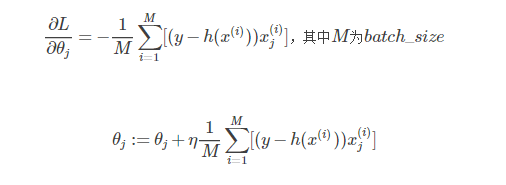

**优点：**

  （1）通过矩阵运算，每次在一个batch上优化神经网络参数并不会比单个数据慢太多。
  
  （2）每次使用一个batch可以大大减小收敛所需要的迭代次数，同时可以使收敛到的结果更加接近梯度下降的效果。(比如上例中的30W，设置          batch_size=100时，需要迭代3000次，远小于SGD的30W次)
  
  （3）可实现并行化。
  
**缺点：**

  （1）batch_size的不当选择可能会带来一些问题。

## 梯度下降优化算法

1. Momentum
2. Nesterov accelerated gradient
3. Adagrad
4. Adadelta
5. RMSprop
6. Adam
7. AdaMax

## 相关的问题

由*梯度下降算法变种*来看， Mini-batch gradient descent (MBGD) 是一种相对较好的策略，但同样不能保证一个最优解。此外，这里还存在很多问题需要处理：

1. 如何选择合适的学习率？。

学习率过小导致收敛太慢，过大又导致收敛动荡甚至偏离最优点。

2. 如何确定学习率的调整策略？

目前调整学习率基本都按照一种 “退火”的思想，要么按照预定模式调整，要么根据目标函数值的变化是否满足阈值动态改变学习率。 但是，“模式”和“阈值”都需要事先指定，无法自适应不同数据集。

3. 对所有参数的更新采用相同的学习率是否恰当？

如果数据是稀疏的且特征分布不均，似乎我们更应该给予较少出现的特征一个大的更新。

4. 如何跳出局部最优？

理论上只有严格的凸函数才可以通过梯度下降获得全局最优解。 但是，神经网络所面临的基本上都是严重非凸的目标函数，这也意味着优化容易陷入局部最优。 事实上，我们的困难往往来自 “鞍点” 而非局部极小点。 鞍点周围通常拥有相同的损失函数值，这导致SGD很难发挥作用，因为每个方向的梯度都接近于0.

## 如何正确的选择合适的优化算法

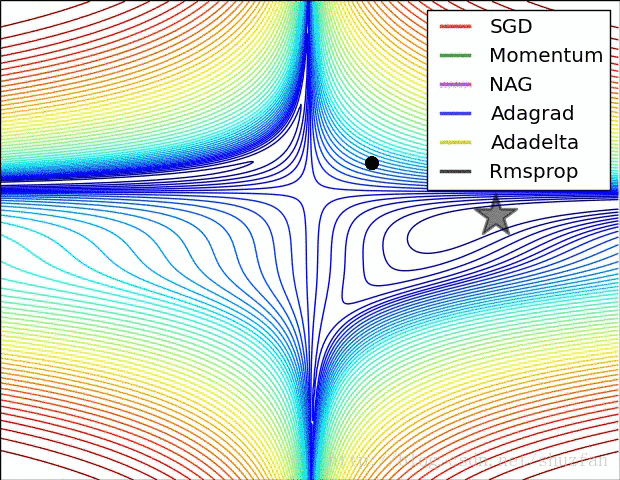

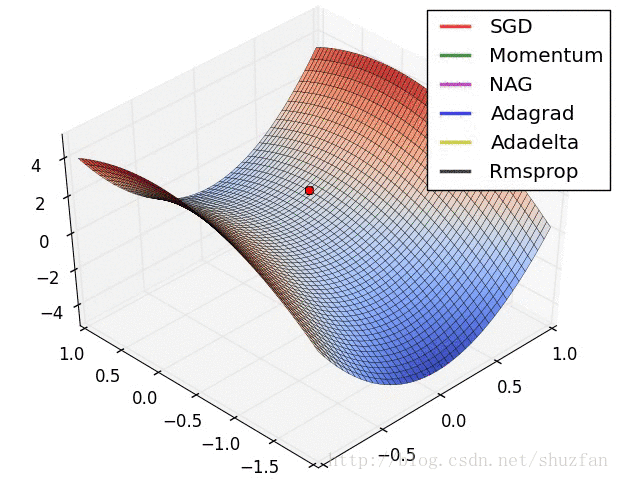

从上图来看，似乎SGD是一种 “最蠢”的方法，但文献 
《The Marginal Value of Adaptive Gradient Methods in Machine Learning》给出的结论却是：
自适应优化算法训练出来的结果通常都不如SGD，尽管这些自适应优化算法在训练时表现的看起来更好。 使用者应当慎重使用自适应优化算法。

# 学习率(α)的优化方法

[梯度下降中的学习率如何确定?](https://www.cnblogs.com/softzrp/p/6916066.html)

1. 固定学习率的梯度下降
2. 优化学习率:(1)计算学习率的方法（2）求α的两种方法[   ①二分线性搜索   ②回溯线性搜索]